## New dataset for airline ratings etc

In [1]:
#import torch
#from torch import nn
#from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer
#from torch.utils.data import DataLoader, Dataset

In [2]:
filename = "airline.csv"
df_rating = pd.read_csv(filename)
df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')
df_rating.head()

/var/folders/d5/029s43s93fq8y41q591jyp1c0000gn/T/ipykernel_73864/1322503581.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')


airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   
1  adria-airways  /airline-reviews/adria-airways   
2  adria-airways  /airline-reviews/adria-airways   
3  adria-airways  /airline-reviews/adria-airways   
4  adria-airways  /airline-reviews/adria-airways   

                           title        author author_country        date  \
0  Adria Airways customer review         D Ito        Germany  2015-04-10   
1  Adria Airways customer review  Ron Kuhlmann  United States  2015-01-05   
2  Adria Airways customer review       E Albin    Switzerland  2014-09-14   
3  Adria Airways customer review  Tercon Bojan      Singapore  2014-09-06   
4  Adria Airways customer review       L James         Poland  2014-06-16   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   
1  Two short hops ZRH-LJU and LJU-VIE. Very fast ...      NaN            NaN   
2  Flew Zurich-Ljubljana on JP365 newish CRJ900. ...      NaN            NaN   
3  Adria serves this 100 min flight from Ljubljan...      NaN            NaN   
4  WAW-SKJ Economy. No free snacks or drinks on t...      NaN            NaN   

      cabin_flown route  overall_rating  seat_comfort_rating  \
0         Economy   NaN             7.0                  4.0   
1  Business Class   NaN            10.0                  4.0   
2         Economy   NaN             9.0                  5.0   
3  Business Class   NaN             8.0                  4.0   
4         Economy   NaN             4.0                  4.0   

   cabin_staff_rating  food_beverages_rating  inflight_entertainment_rating  \
0                 4.0                    4.0                            0.0   
1                 5.0                    4.0                            1.0   
2                 5.0                    4.0                            0.0   
3                 4.0                    3.0                            1.0   
4                 2.0                    1.0                            2.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0                    NaN                       NaN                 4.0   
1                    NaN                       NaN                 5.0   
2                    NaN                       NaN                 5.0   
3                    NaN                       NaN                 4.0   
4                    NaN                       NaN                 2.0   

   recommended  
0            1  
1            1  
2            1  
3            1  
4            0

## Sort sentiment into Positiv and Negativ

In [3]:

#Indeler sentiment værdi ud fra overall_rating
#Positiv - Negativ - (Neutral)
NaN = float("NaN")
neutral_range = {"low": 2, "high": 8}
df_rating["sentiment"] = NaN
df_rating["sentiment"].loc[df_rating["overall_rating"] <= neutral_range["low"]] = "negative"
df_rating["sentiment"].loc[df_rating["overall_rating"] >= neutral_range["high"]] = "positive"
df_rating.head()

/Users/mathiaspoulsen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   
1  adria-airways  /airline-reviews/adria-airways   
2  adria-airways  /airline-reviews/adria-airways   
3  adria-airways  /airline-reviews/adria-airways   
4  adria-airways  /airline-reviews/adria-airways   

                           title        author author_country        date  \
0  Adria Airways customer review         D Ito        Germany  2015-04-10   
1  Adria Airways customer review  Ron Kuhlmann  United States  2015-01-05   
2  Adria Airways customer review       E Albin    Switzerland  2014-09-14   
3  Adria Airways customer review  Tercon Bojan      Singapore  2014-09-06   
4  Adria Airways customer review       L James         Poland  2014-06-16   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   
1  Two short hops ZRH-LJU and LJU-VIE. Very fast ...      NaN            NaN   
2  Flew Zurich-Ljubljana on JP365 newish CRJ900. ...      NaN            NaN   
3  Adria serves this 100 min flight from Ljubljan...      NaN            NaN   
4  WAW-SKJ Economy. No free snacks or drinks on t...      NaN            NaN   

      cabin_flown  ... overall_rating  seat_comfort_rating  \
0         Economy  ...            7.0                  4.0   
1  Business Class  ...           10.0                  4.0   
2         Economy  ...            9.0                  5.0   
3  Business Class  ...            8.0                  4.0   
4         Economy  ...            4.0                  4.0   

   cabin_staff_rating  food_beverages_rating  inflight_entertainment_rating  \
0                 4.0                    4.0                            0.0   
1                 5.0                    4.0                            1.0   
2                 5.0                    4.0                            0.0   
3                 4.0                    3.0                            1.0   
4                 2.0                    1.0                            2.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0                    NaN                       NaN                 4.0   
1                    NaN                       NaN                 5.0   
2                    NaN                       NaN                 5.0   
3                    NaN                       NaN                 4.0   
4                    NaN                       NaN                 2.0   

   recommended  sentiment  
0            1        NaN  
1            1   positive  
2            1   positive  
3            1   positive  
4            0        NaN  

[5 rows x 21 columns]

In [4]:
#Tjekker længden af "content" og tilføjer en extra row med det 
df_rating['length'] = df_rating['content'].apply(len)
df_rating.head(1)

airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   

                           title author author_country        date  \
0  Adria Airways customer review  D Ito        Germany  2015-04-10   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   

  cabin_flown  ... seat_comfort_rating  cabin_staff_rating  \
0     Economy  ...                 4.0                 4.0   

   food_beverages_rating  inflight_entertainment_rating  \
0                    4.0                            0.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0                    NaN                       NaN                 4.0   

   recommended  sentiment  length  
0            1        NaN     424  

[1 rows x 22 columns]

## Compare length of  content with overall rating

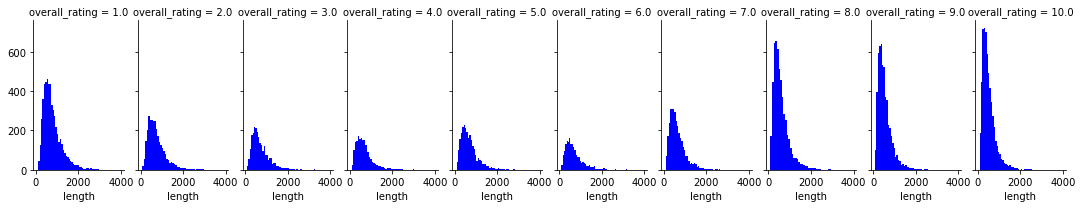

In [5]:
#Sammenligner textlængden af "content" med overall_rating
graph = sns.FacetGrid(data=df_rating,col='overall_rating', aspect= 0.5)
graph.map(plt.hist,'length',bins=50,color='blue')

<AxesSubplot:ylabel='overall_rating'>

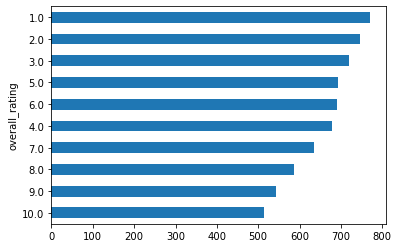

In [6]:
##Viser overall_rating ud fra længden af content gennemsnit
df_rating.groupby('overall_rating')['length'].mean().sort_values(ascending=True).plot(kind='barh')

## Wordcloud representation from positive and negative words

In [7]:
#X_train, X_validation, y_train, y_validation = train_test_split(df["content"], df["sentiment"], test_size=0.2, stratify=df["sentiment"])

filename = df_rating[['content', 'sentiment']]

# splitter dataset til train og et test dataset
train, test = train_test_split(filename,test_size = 0.1)

train_pos = train[train['sentiment'] == 'positive']
train_pos = train_pos['content']
train_neg = train[train['sentiment'] == 'negative']
train_neg = train_neg['content']


Positive words


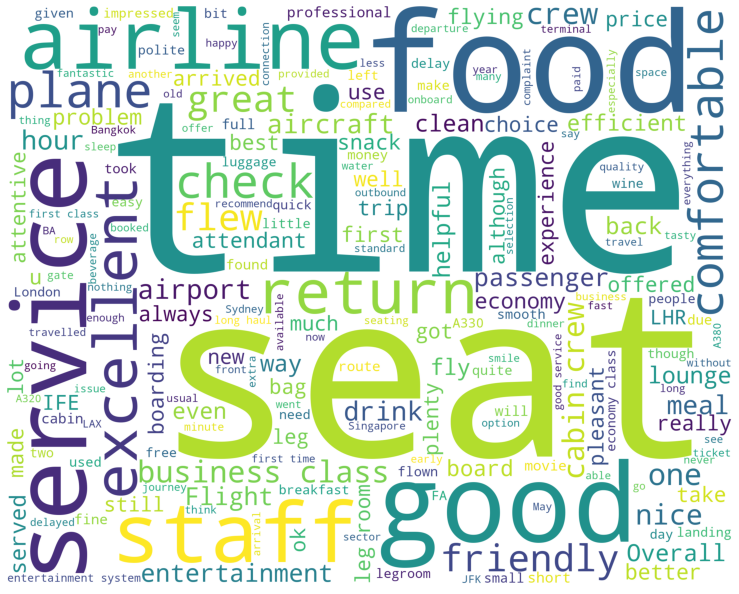

Negative words


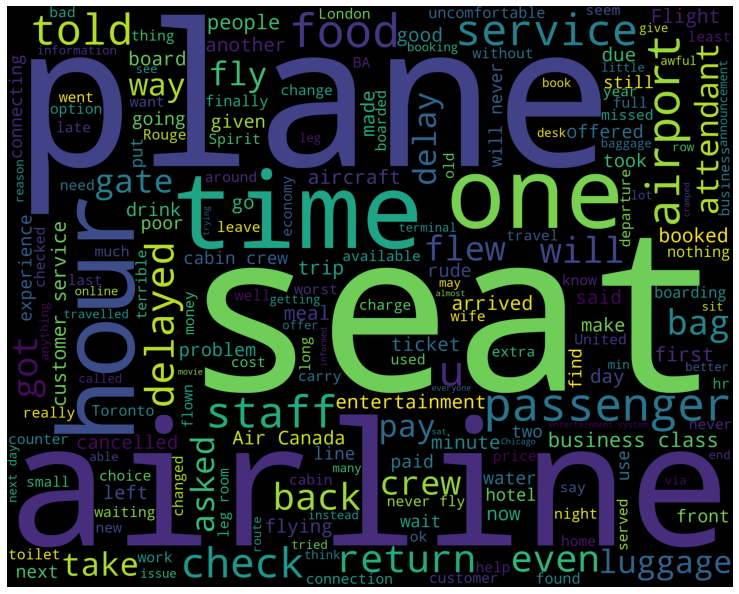

In [8]:


def wordcloud_draw(filename, color = 'black'):
    words = ' '.join(filename)
    cleaned_word = " ".join([word for word in words.split()
                            if 'flight' not in word
                                and not word.startswith('jfk')
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Insert the average rating for each airline company

In [9]:
#Find gennemsnit af rating for de forskellige selskaber
gennemsnit = df_rating.groupby('airline_name')['overall_rating'].mean().apply(float).to_dict()
gennemsnit
gennemsnit['lufthansa']

6.993333333333333

## Cleaning content column

In [10]:
label = LabelEncoder()
df_rating['sentiment'] = label.fit_transform(df_rating['sentiment'])

/Users/mathiaspoulsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

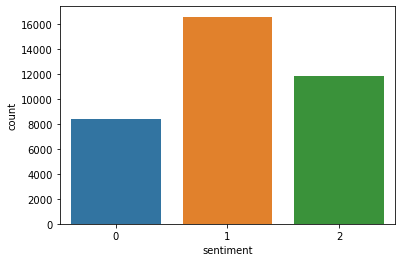

In [11]:
#Fordeling af positive og negative kommenatrer
#negativ = 0, positiv = 1
#df_rating['sentiment'].value_counts()
df_rating = df_rating.dropna(subset=['overall_rating'])
df_rating = df_rating.dropna(subset=['sentiment'])

sns.countplot(df_rating['sentiment'])

#### Getting the words root form

In [ ]:
#Remove all special and numeric character from data and also remove stopwards an apply stemming
nltk.download('omw-1.4')
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

ps = PorterStemmer()

stop_words = stopwords.words('english')
print(stop_words)
lemmatizer=WordNetLemmatizer()
for index,row in df_rating.iterrows():
    filter_sentence = []
    sentence = row['content'].lower()
    sentence = re.sub("[^a-zA-Z]"," ", sentence)#cleaning
    words = nltk.word_tokenize(sentence)#tokenization
    words = [w for w in words if not w in stop_words] #stopwords removal
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    
    filter_sentence = " ".join(filter_sentence)
    df_rating.loc[index,'content'] = filter_sentence
    print(filter_sentence)
    print('')
    print('')
    

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mathiaspoulsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mathiaspoulsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mathiaspoulsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathiaspoulsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

amsterdam moscow delayed due special need passenger leaving plane amsterdam seat airbus still real business class seat common klm ba lufthansa nonsense economy seat person space service good lunch good even special vegetarian meal entertainment system available large choice russian hospitality smiling attentive guest good time first part trip changed plane moscow priority lane work well connecting flight aeroflot moscow ulan bator left time seat boeing used short distance le hour mine medium haul flight hour night flight chair used sleeping real business class flat bed seat plane great pity service good dinner breakfast good even special meal vegetarian entertainment system available large choice russian hospitality smiling attentive guest seat second flight let rest good experience


service great enough food tasty full meal snack drink whenever want takeoff landing great cabin crew pleasant general bad aspect flight slow entertainment system big delay hour general flight good except 

flew buenos aire sydney early january back late january flight sydney started one hour delay arrived scheduled time due fortunate condition inflight entertainment central screen movie ok food great reasonable economy change flight day going back aerolineas made expensive return flight poorly organised check extremely slow unnecessary delay subsequently take delayed hour without explanation flight uneventful aircraft arriving hour late movie board flight ba repeated meal minimal drink offered meal


seat assigned c got plane headrest broken dangling seat back one tried fix splendid first impression toilet back plane smelt disgusting asked flight attendant least kind spray alleviate stench grudgingly produced something stuck hand around door squirted flown several time airline recently thing leaf lasting impression complete lack interest shown cabin crew job disappointing


aeromexico recently restarted flight toronto nice experience flying started half price sale ticket thought bought t

flew aer lingus boston flight ei economy flew excellent plane cabin crew helpful friendly meal plane going excellent new sky menu got steak lovely first class dining economy class well worth included glass wine would recommend getting unfortunately get meal way back sold however meal got still lovely overall would like fly aer lingus future would recommend


travelled aer lingus regional atr dub br dub return sat morning th may excellent service overall flight departed time arrived early return one new aircraft aer lingus lounge excellent well worth short detour point note regional flight take one gate dublin proceed downstairs onto level u pre clearance gate almost missed bus morning flight fact ground staff called anyone else bristol screen gate advised next flight br flight glasgow boarding first perhaps need look advise short bus ride aircraft otherwise well recommended v competition fare excellent value short flight


am svo kja svo am economy feb one stop option route am svo feb 

flew yyz mow yyz flight excellent sheremetyevo airport modern comfortable barely line custom security screening security painless compared u canadian one food great asked extra meal flight gave offered wine free economy class fa also friendly concern delay flew delay min way back washroom broke aircraft delay hour gave u meal voucher got free food svo


lca lhr nice clean aircraft left larnaca time cabin crew looked smart polite paid one way flight value money excellent drink food included although cabin crew came round think time hour flight drink available request needed cabin crew happy serve galley flight meal average find catering flight larnaca great seat comfortable plenty leg room pilot kept u updated arrival time weather back uk always nice know going land bang time despite bad weather london landing probably smoothest ever flight know touched ground wish fly terminal lhr great rather run aegean faulted great little airline definitely fly greece cyprus


flew aegean santorini 

delay hour rude unhelpful staff moscow lack kind information post service inexistent way back mad bkk first flight got delayed hour arrive svo connection bkk already departed instead giving u hotel gave u boarding pas seoul arrived seoul without idea next nobody say anything u information gave u boarding pas bkk korean airline hour later arrive bangkok hour delay inform u bag still moscow worst customer service


istanbul sharjah delhi excellent experience fare lower standard airline well designed clear website clean plane polite crew food available purchase board reasonable rate good quality


astana sharjah astana aircraft new clean economy cabin free food may choose sandwich drink reasonable price food good however however recommend use airline sharjah airport terminal maintained poorly dirty people sleeping floor etc


dep time pm mumbai sharjah boarded flight initial talk captain etc ready take captain must noticed spark taking said going disembark passenger made disembark nothing

took short haul glasgow dublin long haul dublin boston flight time boarding well organized seat comfortable everything looked tired exactly pristine ife nearly impossible use touch screen respond pressure meal okay biryani chicken though piece meat big eraser flight attendant save one nice girl sulky bored made u feel like cattle left plane cabin attendant even look face said goodbye nutshell price good service shocking given generally warm nature irish folk know peculiar


boarded aeroflot amsterdam flight moscow prior departing gate loud commotion rear plane seems traveling restrained reluctant prisoner checked return flight st petersburg amsterdam requested luggage booked thru detroit attendant assured u done upon arrival amsterdam informed klm receive confirmation flight amsterdam detroit seat resold hour later aboard delta flight way home issue translation request relayed russian tour director luggage booked thru detroit never


am kja am boarding amsterdam horror half hour busine

recently traveled u ireland called seat assignment flight paid extra per person seat room row could sleep better turn seat way home leg room reclined wasted money way home entertainment recycled twice watch movie since middle one went adjust get back spot crashed


dub nyc return found comfortable flight service good would comment positively check dublin handled quickly u pre clearance saved massively u side landing domestic terminal return found aer lingus ground staff jfk friendly efficient overnight flight dublin quite comfortable


economy glasgow via dublin new york return glasgow dublin flight arrived time u bound passenger met arriving flight bussed international terminal flight u pre clearance dublin airport however waiting time horrendous flight due depart still completed procedure aer lingus held onward flight connecting passenger resulting one hour delay leaving dublin airbus seating comfortable enough hr flight demand video system offered ample film headphone however poor q

jfk dus dus zrh txl muc muc dus dus jfk reading review trip bit nervous actually trip turned awesome took five air berlin flight week vacation one issue even bag arrived flight time served pretty decent food flight attendant friendly got served chicken pasta long haul flight croissant chip short haul legroom especially tight even person like manageable tall might problem seat equipped personal inflight entertainment good selection game movie select seat choose even number full window instead sitting two half one problem boarding process many people pushing shoving group called airline changed gate muc without notifying u overall experience good much better u airline would definitely fly air berlin


dus auh ab october flew ab short haul quite lot first time long haul much le positive previous time started grumpy attendant luggage drop welcome eye contact order man must hate job attitude gate boarding board le legspace food bad pre ordered vegetarian meal flight attendant robotic ab mov

pu gmp user friendly website made ticket purchasing easy departure delayed minute plane arrived time gmp orange juice water served short flight fa friendly efficient seat pitch leg room may bit tight believe common lcc overall great choice want take domestic flight south korea


busan jeju flight attendant great tried little fun passenger way served drink water juice coffee fortune cookie also kind draw different gift certificate airplane new excellent condition seat quite close together leg almost pressed seat front even though reclined tall might irritatingly tight overall though pretty good airline fly


good considering fare even wonder serve drink minute flight seoul pusan rather cheaper ticket


flown several time almaty bangkok route whilst level top airline problem flight time food ok plane relatively new clean happy continue quickest route complaint


guw ist guw check smooth flight time plane new ife limited hour flight onboard service adequate medium haul economy class fligh

mad iad good value money step appalling service expect legacy u carrier pretty minimal code share united intent united flight aer lingus livery standard legacy service issue complimentary edible meal pay alcohol snack service clean serviceable economy usual cramped seat ife system good price good value


gla ord via dub return flight dublin aer arann fine minute flight flight chicago sat small three row cabin behind business class excellent crew friendly professional meal standard economy fare one bar run wanted wine meal purchase return flight hour great catering tasty overall good product aer lingus


canadian life work south america made trip ecuador canada three time year time traveled baggage misplaced delayed three time row consecutively staff pearson toronto informed baggage custom given three different answer three different employee air canada policy directly speak employee regarding complaint rather write e mail complaint told get response withing day month ac lost article po

instead non stop flight palma de mallorca hr min airline changed flight routing first fly north dortmund germany total travel time hour plane totally full seat number correct staff care drink served hour flight cabin crew disappeared take arrived dortmund told remain aircraft leave hand luggage wait gate boarding min later seating number problem still solved family promised seated together complained staff flight attendant rude arrogant take finally drink served tiny cup dry mini sandwich served palma airport plane docked terminal although gate empty leave plane stair take bus walk way arrival hall


dublin boston return enjoyed new seat ife demand aircraft clean good condition outward cabin crew friendly professional food typical economy fare edible return cabin crew friendly little rushed due shortness flight hr gripe pricing alcoholic drink pre clearance american immigration custom dublin major bonus min plane bus boston airport


lgw dub return online booking worked fine convenient

flew ydf yyz pvg economy although usually check online airport since small airport luggage check shanghai staff friendly efficient first flight deer lake nl toronto comfortable great selection avod food purchase complimentary drink toronto shanghai flight boarding relatively efficient despite full flight take time avod available seat although small comfortable beverage service began minute take accompanied small bag pretzel supper served approximately hour take consisted either pork chicken option chicken cream sauce roasted potato carrot green bean also tray corn iceberg lettuce salad white bun brownie dessert quite decent airline food certainly worst travelling wine selection decent halfway point nissin cup noodle served chicken finger sandwich white bread pack biscuit finally breakfast choice congee egg sausage elected mushroom chicken congee quite good accompanied melon white bun jam butter overall good experience flight arrived smoothly promptly china


ac cdg yyz clean well maint

mia dus ber first impression new airplane clean seat ok seat pitch compact staff correct attentive definitively rude confronted ife excellent brought headphone pay charge rest trip uneventful except tired airport facility dus txl return flight nonstop txl mia priority access granted insisting twice gold status oneworld ruby nobody seems instructed mean plane ife staff little better attitude though nowhere found hand bottle water food average wine always one glass luggage handling ok rate ok main carrier especially belonging one world ab lot take advantage recent incorporation


returned maui flying air canada option rouge never possibly avoid even dedicated ac client year foot inch smaller might somewhat okay comfort wise flight entertainment nice inexperienced attendant obviously strategy operate low cost fair correlate disappointed


k elite member air canada route would normally flown air canada switch westjet u airline great way loose loyal customer air canada change flight routed 

seven hour delay camp maui airport service filthy aircraft interior small cramped seat food left plane sushi breakfast previous trip vancouver young inexperienced flight attendant inadequate air entertainment old movie tv series one ever heard ipad wanted rent one enough plane duty free international flight hard believe rouge created compete like westjet missed mark big time captive popular destination populated rouge service used air canada gone find hard believe say rather fly united look way


flying ft lauderdale toronto paid full fare economy ticket paid priority seat want know priority make board flight last front plane airline give priority access pay extra seat assignment would better picking row free


ac flight yyz tlv business flight flawless service excellent food good excellent ac amazing product well designed comfortable missing overhead bin center row made uncomfortable minute boarded flight attendant anticipate available help seat excellent long enough wide enough yes f

recently returned new york la guardia airport london heathrow first flight delayed meant missed connecting flight london sister missed several appointment work registration phd meeting sister also sister th birthday extra detail made subsequent experience much worse take return flight included connection montreal plane new york delayed offset staff plane incredibly rude disengaged unhelpful asked advice reassurance whole process terribly managed arrived boarding gate time see plane pull away gate better communication definitely could boarded flight five minute delay passenger sent around airport cursory explanation lack basic guidance example one explained shuttle bus hotel even pointed u right direction lack staff airport due bit later evening felt completely unguided process stunned customer focused service could poor grasp good communication moreover seem care customer well arrived london hour scheduled arrival time overall process poor bad food stingy amount sister asked would serv

may th calgary winnipeg ac june th winnipeg saskatoon ac july th saskatoon winnipeg ac july th winnipeg toronto ac recently took four domestic flight air canada flight time crew supposed certainly ticket overpriced competition canadian air market would certainly consider flying


ac july th la vega montreal ac july th fra yyc ac july yyc la vega terrible experience flying air canada business class first segment seating separated wife every time tried change seating could sit together ac staff seem care gave u false info aircraft seating arrangement stop calgary flight attendant familiar u citizen passing give u canadian custom form luggage must picked sent u custom airport air canada ground staff also clear u bound passenger procedure air canada doubt weakest link star alliance family


unfortunate experience flying ac rouge two recent trip one rome one cuba without doubt worse excuse airline anywhere staff poorly trained slow disinterested seat way beyond uncomfortable anyone brutal f

surprised wrote negative review month ago took flight november changed much better new aircraft great leg room biggest beef first review comfortable flight crew professional plane time plane great shape honoured seat selection made check easy enjoy going cancun time winter glad changed leg room better


yyc la return uncomfortable aircraft ever flown seat back upright person front reclined inch seatback nose think hard guess leg room like amazes length airline go cramming seat claustrophobia situation people take


flew london beijing leaving hour catch next flight beijing macau computer unable check online several time heathrow glitch system meant luggage could go macau pick bag beijing check resume journey predicted luggage carousel went lost found several staff stand chat le minute board flight still without bag thankfully lady check speak english showed compassion organised connection located luggage transferred return journey week later flight delayed meant miss plane london air c

traveled la vega last week rouge st last time tall fit seat knee pushing back passenger ahead passenger seated seat ahead upset fact knee back getting looking predicament understanding situation flight full people partying instead trying subdue rowdiness rouge flight attendant joining party finally looked attendant asked keep voice would nice would ask passenger looked something wrong sitting aisle companion next middle young man window seat never actually sat seat instead arm rest facing u foot seat yelling loudly friend sitting around u rouge staff never asked calm actually laughing joking friend fyi night flight normally would flight catching nap hour would normal loud could hear movie watching head phone future never fly rouge would rather take different airline stop direct flight extremely disappointing


flown rouge time nassau sarasota foot sit normal position seat sit seat twist knee either left right position able sit flight assuming person front recline seat happens knee crus

dxb pek pek zuhai flight late welcome onto flight seating bad choice entertainment proper functioning remote reaching beijing connecting flight cancelled due bad weather help organised stand hr line ticket changed took hr landing getting hotel initially thought taking upgrade paying looking service even interested fly economy class overall bad experience


two leg journey shanghai london transfer beijing sat plane shanghai hour ground staff knowingly done nothing accommodate event maybe considered normal finally arrived beijing well passed midnight put hotel nearby told come back next morning lucky got squeezed onto ba flight


ac dec th toronto munich economy class worst experience international travel since least year rude ground service toronto similar bad flight food poor highlight inflight entertainment system quite good economy


positive plane clean arrived safely negative never encountered rude flight attendant food served inedible breakfast thought would order pancake would se

wife flew oslo norway sydney australia january february departed oslo jan returned feb sydney outbound stockholm beijing plane acceptable comparable airline used however service worse crew seemed uninterested food nothing special beverage extremely limited served sync food beijing sydney boeing plane ok service identical one stockholm beijing disappointing return boeing sydney beijing experience repeated service disappointing beverage served late limited except water beijing stockholm airbus legroom limited former selection audio video limited service somewhat better beverage served right food however limited positive side opportunity use air china transit lounge however compensate low quality service overall disappointed trip probably never use air china


travelling airline since moved canada year ago staff remain frumpy dealing sandwich seat unsuitable rugby player invariably gate mile concourse check staff rarely appear pleased see flying ac black friday power failed eastern seaboa

flew rouge toronto athens sept returned sept board entertainment control airflow know disclosed web site disclosed time purchased ticket food awful hot snack consisted dry wrap box horrible large box seat front many seat meant little leg room long trip uncomfortable washroom dirty enough cabin crew trying friendly best would choose rouge


flew embraer sfo yvr say fa absolutely best experienced service top notch problem inflight entertainment system either going flying executive first em try book seat left side cabin since half aircraft


fco yyz sep th instantaneous check quick security good food minute luggage arrival incredibly good crew flown flight last year airline best crew ever premium seat bargain


yyz kin yyz flew air canada discount division rouge kingston flight packed outbound boarding chaotic due passenger returning copious purchase multiple suitcase carry ons flight attendant new hire lack basic skill expected purchased extra leg room seat one first four row aware kin c

long time customer air canada looking airline frequent trip vancouver california rouge represents major drop quality air canada entertainment centre leg room experienced air transat charter flight packed like sardine knee touching seat front anyone simply going fit tiny seat perspective severely damaged air canada brand present big opportunity competitor


flew rouge venice toronto may th flight mechanical problem certainly forecast hence hour late crew delightful supposed delay praise stop seat unbearably uncomfortable economy plus section leg room fine seat problem poor folk behind u packed like sardine first ever seen row seat wife got swollen leg even though got walked frequently think choose rouge


flew montreal nice rome montreal realize booked rouge ac new discount holiday carrier fault really shocked age plane old drop ceiling screen knew new inflight streaming entertainment westjet going way realize plane old think cleaned since new either floor crevice bathroom wall plane fi

vrn fra return atr embraer cabin crew professional kind legroom excellent newspaper available onboard free catering excellent considering flight time h settimocielo box salty snack sweet small cup water hot cold beverage including wine offered cabin crew


flight genoa munich pleasant excellent snack overall atmosphere relaxation throughout flight lot legroom nice plane little noisy side


munich venice return nice embraer flight time snack tasty crew professional quite honest expecting air dolomiti good regional airline


pricing reflect service level reflects frill airline seat uncomfortable cabin crew inattentive inflight entertainment problematic say least window tablet download app stream movie add fact air canada longer give choice destination travel business view vacation destination mean need find new airline


yul mco rouge seat cramped beyond anything experienced sooner fly u carrier stopover fly rouge configuration due limited seat pitch ft tall hand mind byod flight wi fi e

first customer check given opportunity upgrade c nominal fee flying blue mile happily considering affordable surcharge inbound flight premium economy service food superb seat middle section row aircraft fitted recent business class seat seat still angled would get fully flat comfortable enough one negative point screen provide privacy case sit next stranger manageing escape labyrith cdg boarded short flight berlin economy service basic impressed af long haul food beverage service staff attitude made af one preferred airline future travel


terrible experience seat small crammed pretty much sunwing layout seat uncomfortable tv screen bring ipad apparently access movie sit lap table tray try hear work well way back toronto orlando flight sunday april th hour flight delay due mechanical problem instead arriving home pm got home midnight understand weather delay emergency delay ridiculous part missing originally small thing fixed min turned another hour another hour another hour sure knew 

bhx cdg cpt young family economy outbound good service bhx using gate ref transfer cdg problem b fresh interior attentive staff made allowance small child ife good adult maybe need wider content kid overnight flight well managed cabin crew food actually quite good return unable self service check cpt staff unhelpful cpt v small departure lounge b night flight completely full ife slightly damaged functional cabin crew receptive bulk head seat evening meal hot breakfast transfer cdg issue bhx arrival simple fast recommend rather lhr


af cdg lju march nothing special flight paris ljubljana quick non stop airlink two capital city clean newish embraer regional jet basic service cracker soft drink nothing notice fact flying day af canceled flight march make new arrangement wife three flight canceled feb feb april two flight supposed connect af long haul flight single daily flight non stop option available passenger need take connecting flight triple trip length systematic cancellation legal

flew heathrow delhi april year cabin staff lack professionalism hardly smile seem frustrated serve passenger sense customer service saw crew sleeping flight instead serving passenger question ask veg non veg without please air india improve service get competitive food horrible toilet disgraceful entertainment system broken slow finally air india captain crew need polish communication skill intercom difficulty english hindi yes still fly air india


flight icn hkg hour delay hotel provided wonderful aircraft plenty legroom unfriendly cabin crew never smiled seemed tired


fly orlando toronto twice year every year last trip air canada ac decent airline relatively comfortable experience first experience rouge huge disappointment seat extremely cramped legroom seat full flight tv back seat connect mobile device limited wi fi download ac app home laptop fit cramped tray table especially seat front reclined music echoing gave android phone connect positive plane clean crew fancy bowler hat 

dxb pnq dxb check smooth dxb managed get c plane inside looked bit shabby ai aircraft somehow happy extra legroom frame overweight couple took seat b smiling sheepishly man overflowing seat saw empty moved aix served flimsy cardboard box containing sandwich small packet banana chip something fried inedible muffin strange assortment better nothing welcome low cost carrier unlimited water well drink chargeable flight left minute late arriving pnq breeze home minute leaving airport check pnq return leg chaotic usual woman insisted bag overweight smiled lot finally removed laptop hand luggage let go even gave reclining exit row seat seat bottom worn metal bar kept poking rear asked blanket even used blanket told run avoided serious long term damage tailbone moving shifting flight food served leg overall good value money basic maintenance word missing india lexicon could better sitting metal hour fun


dxb ixe boarded apprehension quite pleasantly surprised reasonably clean aircraft pleasan

flight cancelled hour plane leaking found already boarded long awaited vacation cut short whole day even though head quarter paris airplane replace wait bed breakfast next hotel whole day night air france offered compensation terrible customer handling one properly explains anything personnel rude entertainment screen husband work flight staff surprised upset customer flew next day wish never flown ruined start long awaited vacation customer service considering paid euro flight terrible airline customer service airplane broken competitive market idea still exist


traveled ny jfk del igi may ticket slightly expensive airline flight half empty plane boeing er nice cabin configuration unlike airline requested air hostess move front row empty seat behind happily center aisle seat besides empty could sleep laid seat way without disturbance food excellent staff good flight entertainment nice best like esp indian flight time would certainly recommend air india esp jfk del route


th june fli

af cdg sin return flight bit better due pleasant set crew although feel level engagement passenger lacking crew member minimal task serving meal quickly disappearing meal service make good part long flight real problem af plane comfortable long haul cramped seating aircraft full flight feel suffocating crowded unpleasant inflight entertainment need major upgrading small screen blurry image keep hanging limited selection also extra like ice cream main meal selection snack fruit meal fact food served terrible one worst ever experienced left tired hungry scrambled egg served breakfast overcooked heated like puddle yellow mud small sausage looking awkward mess think give impression care given sum experience af improve service product best look option


ai gaya gay kolkata ccu vt sci flight delayed nearly minute ife switched whole duration served cooky bottle water usual duplication seat allocated passenger led chaos reason travel ai ample legroom person cm like reason chose flight cheap fa

mla lgw air malta quick check new fast track security lane malta airport time departure arriving early service board courteous efficient two minor whinges breakfast could something akin fresh orange juice please replace rather bland frankfurter type sausage something akin decent breakfast sausage looking forward new livery november hopefully new branding cover interior plane still missing point credited catania flight reviewed nd august


flying bristol malta rd september removed flight due air malta overbooking flight first day holiday spent exeter tedious boring somewhat unpleasant could hardly compare malta air malta offered u paltry compensation expense way compensated lost first day day holiday apparently learnt common air malta watch


glasgow lourdes journey proved negative review read airline spot plane arrived glasgow four hour late eventually boarded trouble begin counting passenger plane least half dozen time cabin crew asked passenger sitting front seat move back caused gre

singapore casablanca return via paris decent enough product without outstanding upside cabin crew delivered good service stewardess singapore paris run particularly welcoming seat comfort good got plenty sleep flight time downside food great edible withouth especially memorable would happily travel air france


would fly air france would recommend airline anyone flew singapore paris returned frankfurt paris back singapore meal served high standard length flight requires least snack offered well meal


per mru per flew air mauritius codeshare air austral fairly reasonable flight experience price although suffer quite long delay return flight due technical issue aircraft needed sorted cabin attendant friendly responsive way however insufficient water provided return flight warmer usual cabin disappointing food fair honest wine pretty reasonable main issue ground staff boarding process mru lack update delay temporary breakdown boarding card reader slowed thing even ssr plaissance airport 



flew victoria fall windhoek windhoek gaborone flight erj plane actually turned plane piloted woman pilot flight time half full single cabin crew served small meal short hour flight relaxed adequate


august st paris minnesota aboard af flight delayed hour problem air conditioning enjoyed larger seat extra leg room especially like option allowed raise seat front support calf dinner served choice chicken quite good husband choice risotto good flight departed pm light dimmed dinner enable passenger get rest attendant came time offering snack ice cream well additional drink entertainment option exactly offered previous flight need blanket sat compensated hardness seat complaint handling luggage one advertised benefit booking paying premium economy bag tagged priority supposed insure prompt delivering upon arrival stated flight hour late departing therefore minute make connection minnesota traveling friend opt premium economy checked time upon arriving minnesota bag tagged priority defini

fly birmingham seoul via paris pleasant trip apart hiccup check desk seoul overall inflight service good quite wide range choice inflight entertainment inflight meal average acceptable cabin crew could bit smile staff paris extremely friendly good would definitely like fly air france


nz mar nz apr took premium economy class flight auckland loved seat spacious comfortable definitely felt much better red eye flight economy complimentary bottle water great touch tend get dehydrated flight bottle meant ask glass water attendant every minute pillow provided big soft comfortable whether hug prop back usb power outlet though uncommon anymore still much appreciated sure feature exists airline even plausible concept may great passenger play medium via usb device eg movie thumb drive sort flight auckland handful people premium economy cabin service impeccable thoughtful right start attendant even came around mid flight make sure everything okay return fully booked flight attendant really work 

ppt akl mel nz overnight flight short layover akl followed nz july flight b ppt airport facility business class lounge basic akl business class lounge fully stocked yet overcrowded flight ppt mel aircraft pristine condition full flat bed mattress duvet pillow amenity kit provided flight attendant explained detail use seat control provided full turn service one passenger shortly take humoristic original safety instruction video breakfast served two hour landing adequate quantity good quality yet nothing impressive lavatory clean cabin crew professional transtasman flight akl mel service standard previous seat several others function flight attendant restart cabin crew distant restrained professional level previous flight food beverage average ife system plenty choice arrived time one suitcase partially damaged yet anz mel arranged free repair conclusion flight certainly equal quality ppt akl four five star service akl mel three four star service leaving lot improved


akl yvr return fli

sin sez sin used air seychelles direct flight since travelling young child wished travelled via middle east air seychelles staff arrogant unfriendly asked food kid avail get fetch loud conversation co worker across aisle serving food upon arrival sez airport youngest sleeping shoulder needed help hand luggage going stair tarmac instead helping stood watch like circus act night thanks fellow passenger came rescue air seychelles cabin crew really chip shoulder look like happy


lhr sez sez family trip without incident plane pretty empty way plenty space move around fortunately flight first schedule opening air space due volcanic ash plane full capacity expected cabin crew accommodating able obtain refreshment time


heathrow mahe hour hell seat could tilt sharp part plane interior sticking leg asked stewardess could something looked asked jump plane gave cushion put broken plug cover sit bolt upright terrible seat try move cushion would fall say tear end notice another lady opposite seat

flight back london never inflight entertainment long haul journey yet projector onboard disappointing one flight attendant back chat ask refreshment could sleep tell sir know four morning good arrive airport get told aircraft stop lusaka refuel


akl lax akl via ppt first class service onboard outstanding pretty difficult fault crew could professional pleasant food akl ppt ppt lax would home star restaurant le good return still acceptable seat although first generation lie flat comfortable feature worked screen passenger feel invasion personal space boarding leg efficient every leg left early negative ground crew three airport initial check auckland get aisle seat requested confirmed airline month earlier kick quite fuss miraculously one opened thing happened ppt lax arrival lax bag loaded ppt could traced turn next flight good enough economy completely unacceptable first response lax agent could havee dismissive arriving back auckland bag first priority label last appear perhaps grate

travelled nz lhr akl october wonderful flight great service dedicated cabin crew leg issue traveller allowed fly bare foot sandal took boarding second time encountered air new zealand business class flight sitting person b dirty foot ottoman front view whole way thankfully got la said second time happened think horrible


poor experience airasia x airline apparently severely let ground operation foot require extra leg room safely make side airasia x requires spend money extra leg room seat business model issue thus spent extra total check extra leg room seat available turn lose seat preference schedule booking online online system notify make phone call change flight date way actually transfer seat preference new booking online lose seems like flaw operation ground staff offered emergency exit row compensate middle seat quiet zone booked little annoyed getting paid least required extra leg room entering flight hour klia mel astonished find actual fact given middle seat normal row came 

used air new zealand honolulu auckland auckland cairn aug aug cairn auckland auckland los angeles aug good impression company last leg trip auckland la informed confirmed seat given passenger first anz associate mind separating family eventually accommodated u together another row uuncertain would fly anz


mel akl nsn akl mel august trans tasman seat far tightly spaced eating meal uncomfortable process cabin service food offered ok control cabin baggage size quantity return flight hopeless many passenger highly irritated inability find space self check baggage deposit affront required clean cabin area next domestic flight ok back emirate trans tasman


flew premium economy auckland lax premium check nice lounge access course maybe could extra purchase option anyway seat roomy way better economy seat sit funny angle comfortable seemed bit odd food drink good cabin service good flown business class time close bus class get regard overall think great value money given get


flew zest air

vie rix ta rix vie vie rix flown small dash aircraft pre booked hot meal good also pre booked seat proved useless arrival rix smooth hour flight went riga short sightseeing public transportation boarding rix mess flight delayed almost information small waiting room crowded bus aircraft although booked emergency exit row seat quite high fee seat front emergency exit row uncomfortable seat aircraft older run b bad flight experience leg lavatory working ta airport like going back time took two hour get visa pas immigration custom return flightt slightly better smoother check friendlier staff aircraft better condition although also one lavatory working altogether service provided lower quality low cost airline


gyd rix svo air baltic cheap u style carrier air baltic appeared least expensive option arrived gyd discover pay euro cash privilege checking single bag known beforehand would factored price chosen different airline plane told would pay water wanted drink wanted poor american style

aircraft clean inflight team efficient friendly recognise airline offer stripped fare charge luggage seat etc normally provided free carrier view essential get management providing extra control found reserved seat online booking priority check airport booking system seat available return priority check available queued worst thing complaint badly handled pointed small print condition carriage saying seat reservation definitely reserve seat priority check refundable travelling difficult enough without type response carrier pity


vilnius riga istanbul business class u extra whole trip check vilnius unimpressive business class line actually took longer economy boarding done class asked weigh carry onboard thing started look cheerfully greeted offered beverage given tasty hot breakfast coffee something read riga airport lovely modern construction spacious business lounge everything could ask except shower riga istanbul leg passenger business cabin service excellent attendant waited hand 

one way pdx lax everything smooth sailing seat comfortable staff great flight time also like electrical outlet seat big disappointment food nothing substantial flight except cooky small bag pretzel made big deal cooky would preferred option fruit cheese cracker really know thinking would given snack issue


toronto manchester return outbound economy back club used transat previously pleased note general gradual improvement economy adequate club quite good staff fine flight arrived early use


manchester calgary return t club class new upgraded cabin priority check first board plane suitcase labeled priority first carousel seating excellent decent amount recline lumbar support good legroom really meant sleeping offer good amount rest staff faulted attentive polite always ready assist meal good quality presented porcelain plate metal cutlery drink follow entertainment system touch screen modern film tv progs music radio etc could paused anytime travelling kit also provided included blank

mel kul hour flight premium class flight delayed minute really comfortable seat meal ok lack choice really need add meal choice moreover meal menu ran quickly inflight entertainment understood since low cost flight however great provide entertainment premium class passenger friendly attentive flight attendant


traveled ool kul sin hgh kul kul ool one exception flight time early crew helpful friendly efficient pre booked meal high standard food available purchase board also appeared reasonably priced coffee myr per cup around au u per cup case aircraft young clean good condition initial two stage flight baggage checked final destination able simply use transit facility lcct instead go immigration baggage collection custom rechecking etc seat comfortable little narrower however unless overweight problem legroom appeared comparable airline flown range full service airline previously aax opinion aax rate favourably buy sale fare represent outstanding value hesitate fly


sydney bangkok vi

london kl christchurch return four flight comfortable well looked professional crew food good best value cup noodle air asia x refrain making lengthy annoying announcement draw meal service one accustomed full service airline ask meal time service cabin clean bathroom time appreciated kl chc kl brand new worth getting seat last row spaced comfort onboard food expensive paying nzd similar problem aud eur gbp always best myr handy return great deal felt great end flight


kul del newish plane flight departed time extremely efficient fa happy obliging purchased couple beer outbound reasonably priced legroom sufficient arrived delhi minute early excellent round service


numerous flight rep kul kul hkt hkt kul kul sgn experience differ airport check boarding smooth nice leather seat although lot bare minimum legroom good selection food drink cheap satay chicken quite oily however tandoori chicken wrap nice every flight time early kuala lumpur lcct bit old grubby expect travelling low cost


stn kul per back pleased leg used online check possible flight online check allowed flight australia due visa efficient useful flying hand luggage able get check quickly way back bag drop quick efficient ft ample leg room flight purchased airasia comfort pack consist inflatable neck pillow blanket eye mask excellent value money useful meal stn kul fine international malaysian


gold coast kuala lumpur return flew economy premium return avoid check queue recommend online check took minute luggage drop economy fairly comfortable although legroom tight tall passenger recommend paying extra amount one hot seat either front row exit row check offer block economy seat extra fee space flight day flight need sleep impressed meal also come bottle water onboard food purchase item reasonably priced fair variety looking forward return flight premium class need online check premium dedicated check queue maximum premium passenger business lounge air asia x pay per entry plaza premium lounge availabl

lgw yyz non stop flight airbus long walk airport check entrance initially unable find check desk minute looking around notice sign pointing back corridor check fast efficient bag kg agent charge flight departed late pilot made time air flight full except open seat hour air provided complementary meal non alcoholic drink every often flight attendant came around water tea coffee since one older aircraft tv every row like inflight movie read book instead overall satisfied service received use future


summer flew frankfurt calgary economy new real pleasure comfortable seat leg room personal led screen entertainment available excellent new cabin lighting soothing travelled air transat many time older aircraft cramped ok definitely fly long haul long new plane


kul stn comfortable seat delicious food always air asia bigger legroom many carrier price air asia x great deal indeed bring enough book magazine etc entertainment board


kul mel pre booked exit row fee first impression good seat a

sin kul vte return flight flight okay clean though gum seat pocket crew member pleasant flight except one vte kul route


showed hour early tsa alaska problem made miss flight small print symbol calling additional security screening missed tsa went board send back tsa missed flight worst part put next flight destination another airline made wait hour another alaska flight would better driving avoid flying alaska air future


husband refused fly airline approved oxygenator take hand luggage would used flight purchased first class ticket seattle hawaii put u another airline seat economy cost ticket pp paid pp gave u refund pp


lax pdx bli bli sea sfo flight completely full comfort aircraft surprisingly good let staff robotic flight attendant going motion check staff bellingham agonizingly slow two customer front min later still two customer front finally reached counter bag pound told pack took one shoe suitcase put carry accepted suitcase horizon air flight pdx bli sea flight attendant

allegiant air become known delay airline two hour delay leaving st petersburg minute delay leaving knoxville return flight used airline countless time year even recommended friend far worst experience flying first nickel dime everything including print boarding pas spend money load app lady ticket counter st petersburg really rude seat cramped really comfortable


flown airline several time clearwater de moines back started using allegiant year ago moved florida early day time convenient seemed mechanical problem increasing habit nickel diming passenger death annoying tried add carry bag app work charged airport called customer service waited hour would refund next trip dsm southwest


usually fly delta southwest despite review thought would give allegiant air try left tampa st petersburg arrived hr ahead time yes saw hr suggestion always get bag drop min took min wait line drop bag adequate staff upgrade one bag already paid got security fine gate agent threatened close boarding door 

flew last week toronto brussels via rome brand new flight left time rome landed min advance flight attendant courteous flight meal intercontinental flight absolutely excellent quality abundant drink free without limitation entertainment system board modern varied spend many hour general service thus average european airline encountered problem transit fiumicino


experience alitalia poor paid extra seat leg room find extra space passenger well staff used room aisle actually keep foot tucked seat people tripping u overhead lighting work audio equipment found staff extremely unfriendly gate line ups chaotic would never fly


istanbul rome june check agent business class refused attend u though clearly mentioned welcome passenger flying classica plus counter returned queue attended informed suitcase extra kilo explain teach agent coming brazil allowed carry piece kg kg trying convince even want job read carefully e tkt mention thing third trip airline always issue


flight delayed hour du

aa completely lost trust woman check counter knew nothing free bag military civilian paying bag gave u boarding pas mentioned nothing delayed found noticed time different boarding pas time came board find flight cancelled noticed plane gate approached aa attendant woman apologized forgetting announce looked another flight u found one flight check gave u hotel voucher shuttle run every half hour mean would leave hotel order make flight boyfriend find flight tracker discover cancelled try call customer service reschedule hour wait time phone finally get man phone suggested flight jfk able make time even left moment would wait every min shuttle get airport train get stop long term parking get bus get u car drive hour jfk put u flight chicago getting u nearly pm whole saturday gone aa wasted u lot money time never fly


happened airline revolved greedy money making machine turn allowed people become smug uncaring others used happen day person ft in boarded plane consideration care extra mo

family traveling march flight aa dca washington ronald reagan national c pm mia miami international airport airplane old could see paint chipped right wing seat e f seat next window would move back inclined back landing pressed button could get seat move back upright position male flight attention called attention said could move said seat american aesthetic functional airplane lacked tray table accordingly served drink place put drink furthermore tray table absent old plane even lock hold place gone plane plane properly cleaned flight flight overbooked seat narrow even though paid better seat mother normal weight body proportion difficulty getting earlier trip washington dc miami newer plane problem


th april aa return aa first last trip aa told would flying new aa plane simply true one pay price going fly dirty broken old plane business ridiculous seating arrangement entertainment system broken never fly aa seriously need game compete emirate singapore etc


goa alg goa st flight go

flown grand island ne phoenix mesa twice past two year departure time well arrival staff end pleasant speak route particular one seems good job mesa airport beat experienced


excellent flight great service provided cabin crew drink served prior take flight new larger aircraft route make difference much improved flight experience time departure arrival allowed better connection transatlantic flight london


grr ord crj first class seat booked ba avios point short flight get chicago connect ba flight home welcomed onboard offered pre departure drink seat comfortable plenty room crew great offered drink snack short min flight


terrible experience around flight delayed three hour place hang dress uniform generally terrible confrontational service people spent half time berating customer actually job correctly maybe terrible track record customer service choice next time fly even care cost


flew phl am return january frill single aisle plane time food fine one glass wine free brought ipa

aa raleigh rdu london lhr dec initially boarded old rust bucket disembarked couple hour later due mechanical problem told u mechanic would problem fixed hour inevitable announcement hour later fix plane would depart next morning aa provide hotel overnight another hour ordeal passenger lining see one representative next morning made way gate boarded plane captain announced fixed tested waited departure never departed one hour later captain announced plane still fit fly annoyance u passenger wait hour airport another aa rust bucket come save u london hour delay separate boarding flight finally made london christmas morning return flight aa london lhr new york jfk operated brand new course flawless lesson learned tip everything avoid flying chance flying good plane back unreliable day moreover want entertainment comfort avoid cost ultimately aa good airline fly right plane


dec economy flight dca lax back lax forced sit row even reserved main cabin upgrade crew member informed u aircraft

flew american airline october th year dublin jfk husband two son staff onboard day excellent back seat beside staff one could made flight comfortable first flight america travelling youngest son autism quite worry staff made u comfortable travelling back state make sure american airline


began simple flight san jose ca new york ny jfk connecting lax resulted frustration anger upon arriving san jose international airport two hour spare fianc checked bag flight projected leave pm pst read time departure kiosk without announcement update flight arrived late refuelled turn minute delayed missed connection lax five minute spending far much time customer service office rebooked delta flight jfk told need check would go gate speak representative counter hour flight walk appropriate gate told listed passenger seat u american booked seat behalf returned customer service office spending hour waiting line american airline rep took u counter counter trying find u two seat plane availability place

take parent airport today fly sea jfk alaskan airline flight powered american airline early airport check alaska got directed go american airline reason needed check alaskan airline employee cheerful eager help showed american airline even able check even though minute takeoff minute late automated check wait another line gave another flight added extra stop dallas changed travel time hr originally hr journey accept even though tried plead get original flight terrible thing got standby gate minute earlier original flight going take mean parent fast people even normal line tsa could made original flight never third party travel site stupid confusion flight terrible


flew economy seattle narita bangkok overall flight nice flew new seattle narita plane clean comfortable ife great selection movie japanese meal set also good crew friendly even though full flight plane felt comfortable large window great interior lighting made trip enjoyable second leg nfrt bkk older plane clean seat worn n

boarding pass printed dfw airport showed flight dfw tyr originally scheduled pm delayed pm still went gate see delay changed monitor showed flight delayed pm returned gate pm told flight left flight dfw tyr afterwards assistant checked u flight next day requested whether voucher hotel told called customer service blamed listening announcement rent car return home drove back dfw next day return rental car person trying shift responsibility away somebody else made profit charging passenger providing le service whats celebrate


flight aa dus lhr onboard n nn b flight time smooth food drink buy crew typically american friendly legroom adequate


flew nh iad nrt seat existing st seat satisfactory though control worn dated always nh service excellent pyjama course japanese western meal excellent alcohol selection fa always seemed keep eye passenger needing anything attention every detail impressive ife needed updating strongly recommend ana


opportunity fly dreamliner frankfurt tokyo haned

st pete allentown pa delayed hour deplane bad weather ahead understand put back plane thunder lightning delayed another hr onboard arriving hour late return flight day later arrived told hour delay finally pushed time boarding hour air close destination announcement made could land st pete fl would go tampa would shuttle u st pete organization others waited forever wheelchair one push finally got going hour later even find shuttle bus rent car tampa


lax phoenix really unhappy customer service american airline employee lax flight coming lax run really late bumped later flight next day arrived airport flight phoenix departing usually arrive airport hour domestic flight usually plenty time checked kiosk computer would print bag tag grabbed airline employee directed u baggage check line others issue printing four people deep worried minute line barely moved started become nervous tried talking couple agent taking bag u sticking later flight could still make gate apathetic kept telling u 

paid two seat airline website would allow u choose seat time booking return week later book lo behold paid seat left call airline told unless pay additional per person depend kindness others move seat sit together absolute crap book seat time booking buy ticket unless willing pay additional actually get seat


flew mco via mia punta cana first leg fine hour flight every completely satisfying second leg miami punta cana total disappointment first international flight aa airport rejected enter lounge flight caribbean access excluded logic never understand two flight attendant absolutely passive service spent time rather making joke actively ignoring request glass water getting visa document one flight attendant hand pocket time going aisle never disappointed business class flight sure aa customer onboard glad lot option u flight market


flight jfk mma check staff helpful polite thought flying arik would pleasant experience regardless bad review ala case security briefing uninspiring say

asiana excellent experience dreadful experience united cancelling connecting flight midnight able get flight lax asiana asiana new go direct flight lax seoul extremely quite smooth shaking noise like b fully reclining leather seat comfortable bathroom nicest seen including port hole see toothbrush toothpaste nice touch bathroom female staff dressed nine polite food wonderful wine choice good asiana certainly vote u based carrier learn lot


asiana check aircraft condition status last minute passenger aboard turned problem plane failed identify fix next hour aircraft took whole hour supposed mean time passenger close suffering heat exhaustion turn c air real refreshment small cup drink three hour period either checked plane beforehand could left time could taken another aircraft least neither option possible could waited terminal could least walk around get food compensation kind made airline customer reason give airline review ground worker swift helping people get next connecting flig

syd icn lax business leg service excellent beautiful meal overall experience syd old angled lie flat end preferred spacious could sleep side quite comfortably icn leg new smartum business suite felt contained tight flat bed good slept well like coffin feel overall lie flat superior flight experience would fly either oz inflight service best


flew sea icn han sgn icn sea march oz first rate usual airline must best training cabin crew ground personnel never seem say asiana flight seem crowded international carrier keep returning asiana comfort food good agree entertainment system need upgrade newer plane fine please asiana keep economy spacing plane


ord la return wife recently made trip friend flight la old livery seat meant engine right next extremely noisy hour md economy seat comfortable ord considerable snow day de icing truck broke front aircraft delayed u going extremely turbulent flight flight deck kept u loop whole time flight back ord old livery b pushback minute ahead schedu

flew economy long ago london heathrow seoul incheon airport found crew pro active always smile face nice see seat however could comfier still satisfied plenty entertainment personal television meal delicious enjoyed time asiana airline


austrian never really radar flight vienna new york say impressed austrian fly hour flight seat catering impressed took individual seat window comfortable table space left right side seat converted fully flat bed comfortable although perhaps little bit narrow side ife also interesting remote touch sensor control cursor screen could also use touch screen simple system perhaps worked well catering superb wow onboard chef prepares warms fresh healthy meal antipasti dessert brought trolley could make choice rigatoni pasta main dish delicious best surprise yet come though coffee menu ten option completely spoiled ended choosing wiener eiskaffee ice coffee espresso ice cream whipping cream served tall glass walked away impressed austrian


flew business class

icn oka brand new single aisle plane new slim economy seat avod touch screen top notch comfortable full hot meal hour flight ife many necessary short flight short program kept entertained award winning cabin crew warm smile usual


lax seoul check quick efficient plane boarding became bit manic inch pitch make big difference comfort access ife touch screen big selection movie etc food good western meal steak flight attendant make asiana good nothing much trouble


vie del one best flight ever start finish crew food ife seat exceeded expectation crew efficient engaged great sense humour seat well designed though found opening aisle bit tight ife amazing picture clarity never aircraft told seat unit self contained replaced simply popping master server many glitch found elsewhere occur food excellent served pazzazz sorry arrive experience end delightful every respect


o dec cgn vie fokker o dec vie iad service impeccable flight time staff enjoyable well efficient inflight service flawles

tupolev used baku nkhchivan interior plastic curtain hung wire front window air conditioning poured steam ventilation backrest seat damaged table held place fastening seat front damaged landing careful free water served long ground stay got air


best economy class ever flown hardest working responsive crew ever flown comfortable spotlessly clean throughout hour flight definitely use asiana


incheon chicago business class best business experience route u check incheon fast efficient lounge icn immaculate plane clean standout service fa seat full flat lot room ife good food exceptional wine selection great fa regularly served champagne without asked truly star experience


sydney seoul seat wide comfortable economy reclined enough sleep shortly take fa gave various small amenity slipper found useful walk around plane hot towel menues given breakfast food best flight beverage served regularly fa offering water juice ife good screen older style ptv staff service standout fa efficient fas

In [ ]:
#x = df_rating['content'].head(33)
#pd.set_option('display.max_colwidth', None)
#y = df_rating['sentiment'].head(33)

#ps = PorterStemmer()
#corpus = []

#for i in range(len(x)):
#    print(i)
#    try:
#        review = re.sub("[^a-zA-Z]"," ", x[i])#cleaning
#         #review = nltk.word_tokenize(review)
#        review = review.lower()
#        review = review.split()
#        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
#        review = " " .join(review)
#        corpus.append(review)
#    except KeyError:
#        pass

In [ ]:
#corpus

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer(max_features=5000)
#X = cv.fit_transform(corpus).toarray()

In [ ]:
#X.shape

## split data til train og test

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_rating["content"], df_rating["sentiment"], test_size=0.2,
#stratify=df_rating["sentiment"])
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#X_train.shape , X_test.shape , Y_train.shape, Y_test.shape

## Naive bayers model ->>>

In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import accuracy_score , classification_report, confusion_matrix 
#mnb = MultinomialNB()
#mnb.fit(X_train, Y_train)

## Tester model ved brug af test data

In [ ]:
#pred = mnb.predict(X_test)

## tjekker accuracy, matrix og classification report


In [ ]:
#print(accuracy_score(Y_test , pred))
#print(confusion_matrix(Y_test , pred))
#print(classification_report(Y_test , pred))

## Forskel mellen acutal og predicted data

In [ ]:
#pd.DataFrame(np.c_[Y_test, pred] , columns=["Acutal" , "Predicted"])

## New machine learning model

In [ ]:
from sklearn.model_selection import train_test_split
Independent_var = df_rating['content']
Dependent_var = df_rating['sentiment']
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)
print('IV_train : ' , len(IV_train))
print('IV_test : ' , len(IV_test))
print('DV_train : ' , len(DV_train))
print('DV_test : ' , len(DV_test))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression( solver = 'lbfgs')
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

## Model predictions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

In [ ]:
example = ['I am satisfied']
example1 = ['A real disappointment']
result = model.predict(example)
print(result)

## Saving model for later use

In [ ]:
pd.DataFrame(np.c_[DV_test, predictions] , columns=["Acutal" , "Predicted"])

In [ ]:
#import pandas as pd 
#vec = TfidfVectorizer()
#text_db = df_rating['content'].head(20)
#tf_idf =  vec.fit_transform(text_db)
#print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

In [ ]:
positive_content = df_rating[df_rating['sentiment'] == 1]['content']
positive_content = positive_content.values.tolist()

negative_content = df_rating[df_rating['sentiment'] == 0]['content']
negative_content = negative_content.values.tolist()
negative_content


## Positive ratings

In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
text_db = positive_content
tf_idf =  vec.fit_transform(text_db)
words_df = pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names())

In [ ]:
words_df.mean().sort_values(ascending=False).head(20)


### Negative ratings

In [ ]:
vec = TfidfVectorizer()
text_db = negative_content
tf_idf =  vec.fit_transform(text_db)
print(vec.get_feature_names())
words_df = pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names())
words_df.mean().sort_values(ascending=False).head(20)

### Getting lists of positive and negative words

In [ ]:
positive_words_file = 'positive_words.txt'
negative_words_file = 'negative_words.txt'
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        return words
positive_words = readFile(positive_words_file)
negative_words = readFile(negative_words_file)


In [ ]:
#how many times does the positive words appear in the positive review content column?
# Python program to find the k most frequent words
# from data set
from collections import Counter

# using list comprehension
positiveListToStr = ' '.join([str(elem) for elem in positive_content])
negativeListToStr = ' '.join([str(elem) for elem in negative_content])

# returns list of all the words in the string
positive_split_it = positiveListToStr.split()
negative_split_it = negativeListToStr.split()

  
# Pass the split_it list to instance of Counter class.
positive_Counter = Counter(positive_split_it)
negative_Counter = Counter(negative_split_it)
  
# finds the 1000 most common words into a list of tuples
positive_most_occur = positive_Counter.most_common(1000)
negative_most_occur = negative_Counter.most_common(1000)

  
print(positive_most_occur[:5])
print(negative_most_occur[:5])

In [ ]:

positive_dict_list = []
negative_dict_list = []

for index, tuple in enumerate(positive_most_occur):
    element_one = tuple[0]
    element_two = tuple[1]
    if element_one in positive_words:
        my_dict = {element_one: element_two}
        positive_dict_list.append(my_dict)
        
for index, tuple in enumerate(negative_most_occur):
    element_one = tuple[0]
    element_two = tuple[1]
    if element_one in negative_words:
        my_dict = {element_one: element_two}
        negative_dict_list.append(my_dict)
        
print(negative_dict_list[:5])
print(positive_dict_list[:5])
    

### Visualizing data

In [ ]:
#Positive
#flatten out array
positive_res = {}
for item in positive_dict_list:
    positive_res.update(item)

positive_keys = [key for key in positive_res.keys()]
positive_values = [value for value in positive_res.values()]
plt.bar(positive_keys[:6], positive_values[:6])

In [ ]:
#Negative
#flatten out array
negative_res = {}
for item in negative_dict_list:
    negative_res.update(item)

#delayed is not in its root form and should be --> delay
delay_sum = negative_res.get('delayed') + negative_res.get('delay')
new_delay_dict = {"delay":delay_sum}
negative_res.update(new_delay_dict)
negative_res.pop('delayed')

negative_keys = [key for key in negative_res.keys()]
negative_values = [value for value in negative_res.values()]

plt.bar(negative_keys[:6], negative_values[:6])